# Data preprocessing and analysis

In this notebook I will preprocess the data, remove the "bad" rows (see below) and split the data into train and validation parts

### Loading the dataset and libraries

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
import seaborn as sns
import matplotlib.pyplot as plt


df = pd.read_csv('./data/diabetes.csv')

df.shape

(768, 9)

### Understanding the data

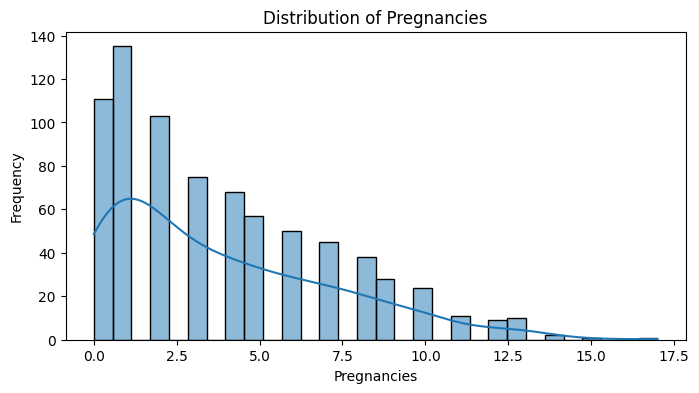

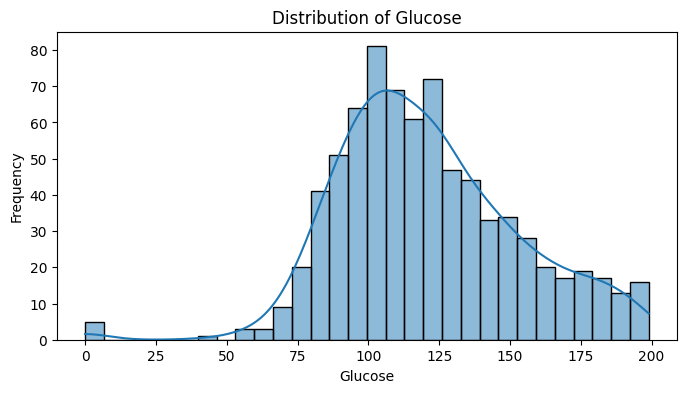

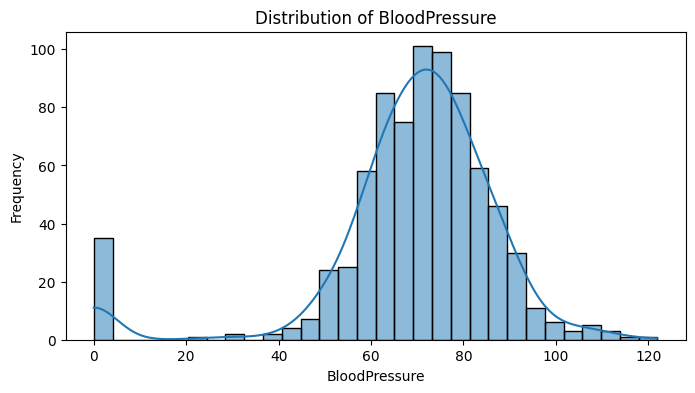

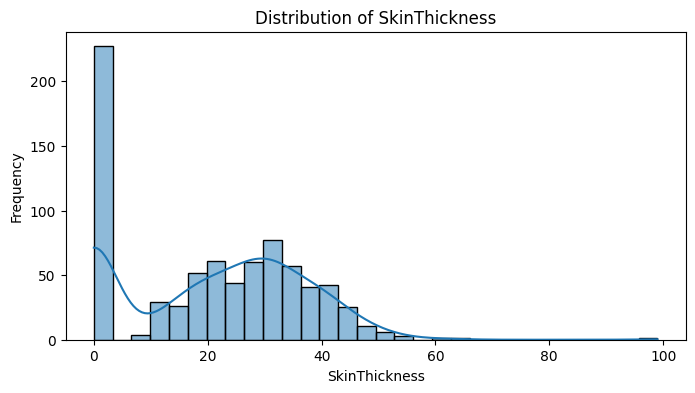

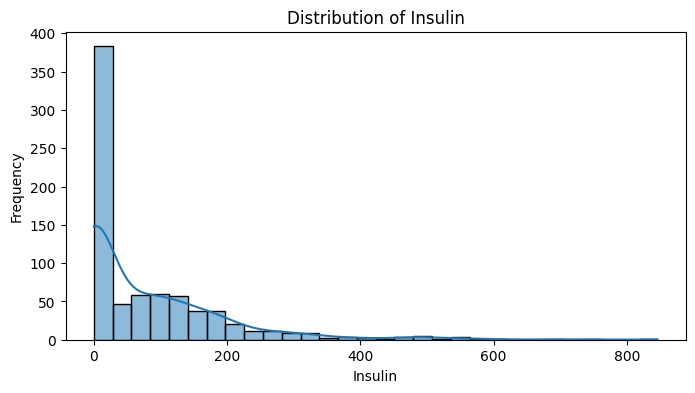

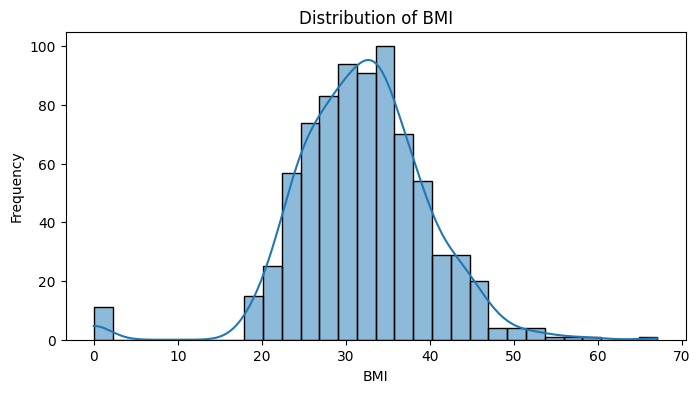

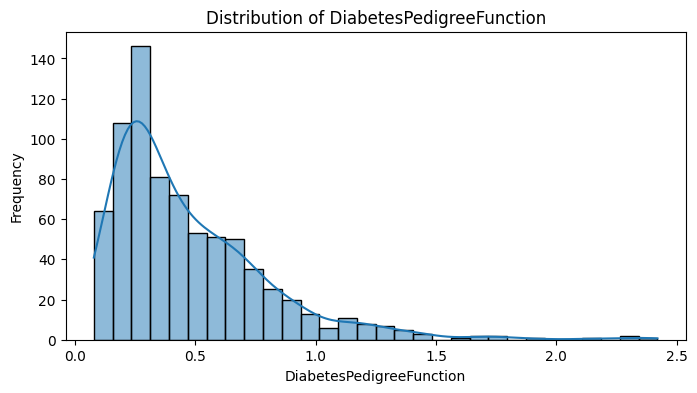

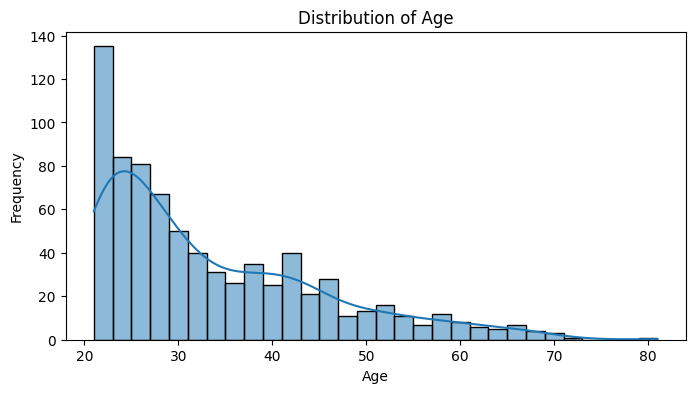

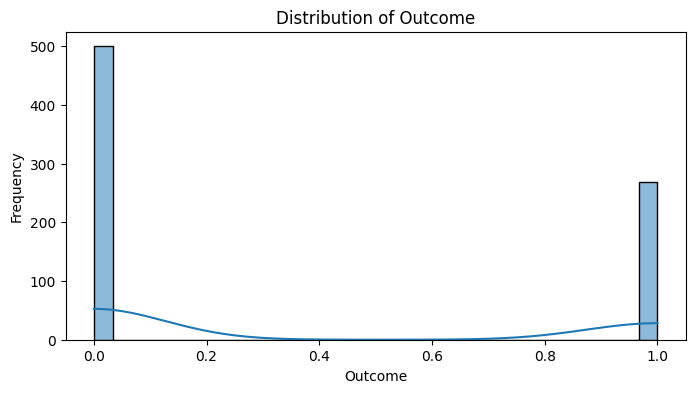

In [91]:
def printDistributions(df):
    for column in df.columns:
        plt.figure(figsize=(8, 4))
        sns.histplot(df[column], kde=True, bins=30)
        plt.title(f'Distribution of {column}')
        plt.xlabel(column)
        plt.ylabel('Frequency')
        plt.show()

printDistributions(df)

### Cleaning the NA values if there are any

In [92]:
print(df.isna().sum())

df = df.dropna()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64


There are no NA values, however there are some zeroes which don't make sense. For example we have 0 BMIs

In [93]:
zero_counts = (df == 0).sum()
print(zero_counts)

Pregnancies                 111
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                     500
dtype: int64


Let's drop the rows where the BMI, Insulin, SkinThickness, BloodPressure and Glucose values are all 0.  \
We will consider these cases not correctly measured patients

In [94]:
df = df[~((df['BMI'] == 0) & (df['Insulin'] == 0) & (df['SkinThickness'] == 0) & (df['BloodPressure'] == 0) & (df['Glucose'] == 0))]

In [95]:
df.shape

(768, 9)

In [96]:
for column in ['BMI', 'Insulin', 'SkinThickness', 'BloodPressure', 'Glucose']:
    median_value = df[df[column] != 0][column].median()
    df[column] = df[column].replace(0, median_value)

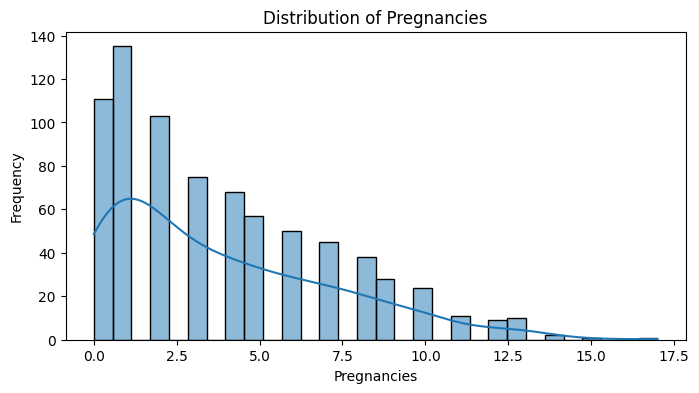

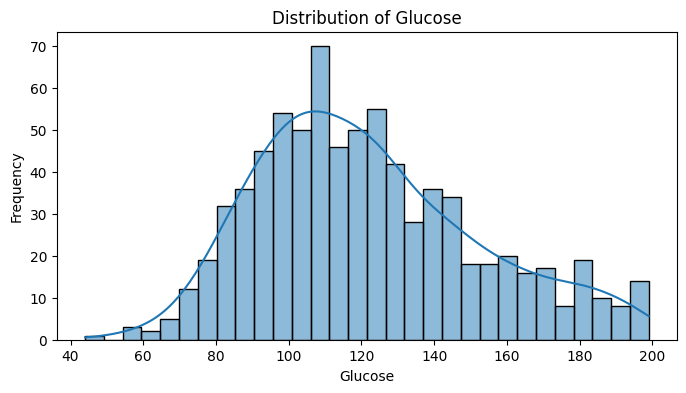

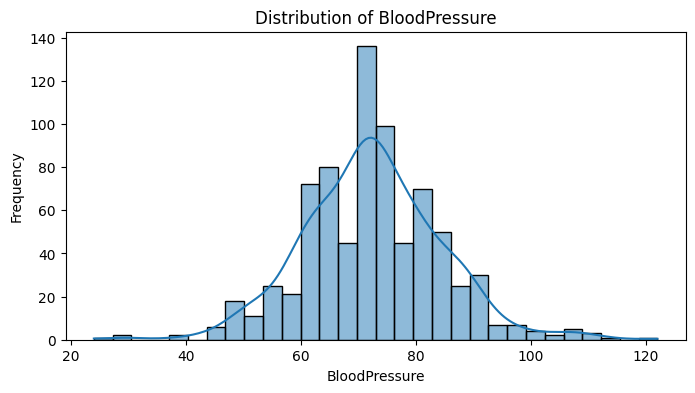

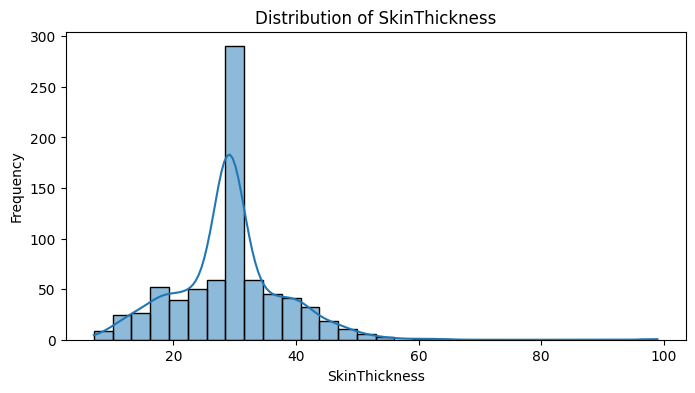

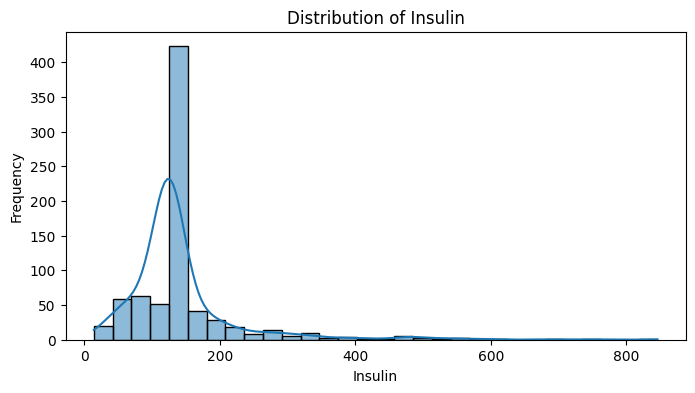

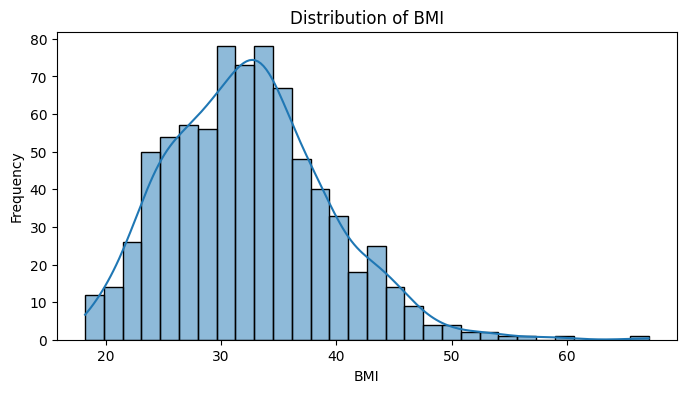

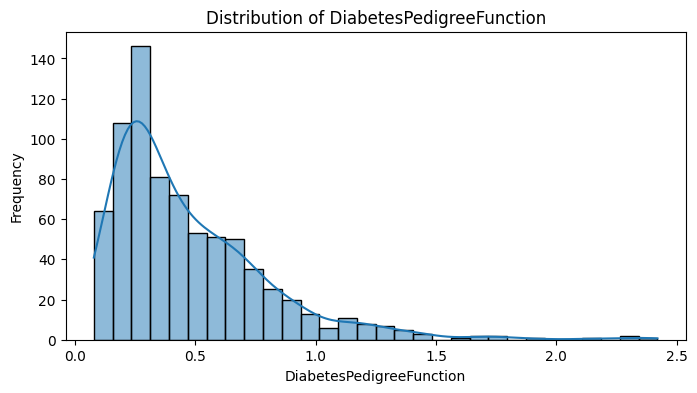

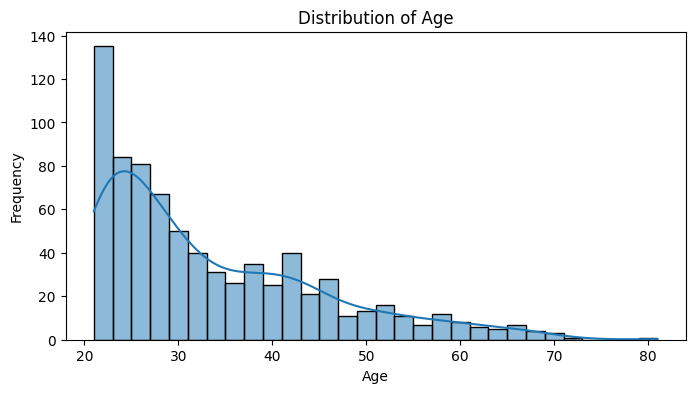

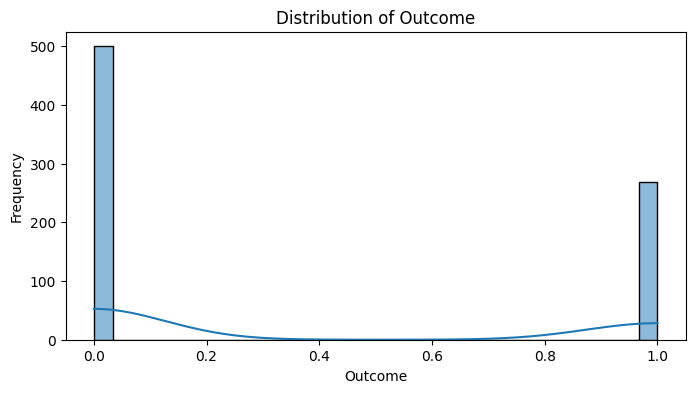

In [97]:
printDistributions(df)

## Plot the correlation matrix to further understand the data

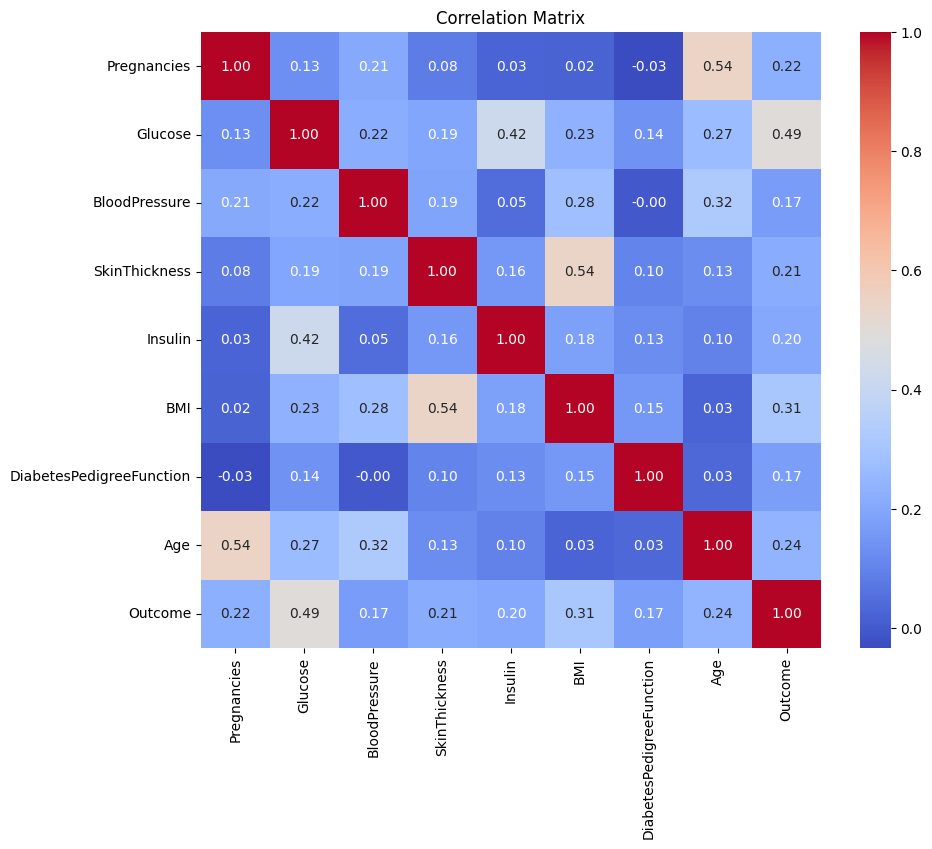

In [98]:
correlation_matrix = df.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="coolwarm")
plt.title("Correlation Matrix")
plt.show()

Looks like the columns in the dataset are not correlated which is good for our case.  \
I think our dataset makes much more sense now!

### Dividing into train and validation sets

I am going to apply knn and logistic regression on this dataset. I decided to split the dataset into 2 parts train and validation. The train dataset will be further split into train and test datasets. I will train the models only on the train dataset, after that I will compare the predictions of the models on the validation dataset.

In [99]:
train_df, val_df = train_test_split(df, test_size=0.2, random_state=42)

train_df.to_csv('train.csv', index=False)
val_df.to_csv('validation.csv', index=False)
